In [2]:
nx = [0,33.115999999999985,47.778,105.765, 162.192, 190.05, 193.06, 199.087,248.269, 262.219 ]
nxsig =[1.5,3.03, 3.083,1.82, 2.44,2.026,1.75, 2.34,1.78, 1.946]
ny = [0, 0.015078407720144751, 0.02008435428800964,0.025174966013795878,0.030072173215717722,0.06521848191441328, 0.03509475584077008, 0.030072173215717722,0.06896212282567259, 0.0780297528008733]
nysig = [.001, 0.008704866404326045,0.01004116864014649, 0.011257169805680528,0.012275067199730998,0.018082452921275183, 0.013262243108108536, 0.012275067199730998,0.018418196996247617,0.01949222302606401]

In [3]:
953.308-705.039

248.269

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.special import factorial
from scipy.optimize import curve_fit
import numpy as np

def func(x, *params):
    y = np.zeros_like(x)
    k = params[0]
    y0 = params[1]
    y = y + k*x + y0
    return y


guess = [1,0]
npopt, npcov = curve_fit(func, nx, ny, p0=guess, sigma = nysig)
nx_fit = np.linspace(0,300,100000)
nfit = func(nx_fit, *npopt)
print(npopt)
print(np.sqrt(np.diag(npcov)))

[0.00023165 0.00011861]
[2.63851623e-05 9.05965254e-04]


In [5]:
xme = np.linspace(0,1000,10000)
slope = 0.03200525033693398/42.8028825456277
slope2 = 0.021/42.8028825456277
slope3 = 0.00023165    + 0.000026385  
slope4 = 0.00023165    - 0.000026385
slope5 = .0211/42.8028825456277
oz_yme = slope*xme
yme = slope2*xme
yerrp = slope3*xme
yerrm = slope4*xme
y5 = slope5*xme

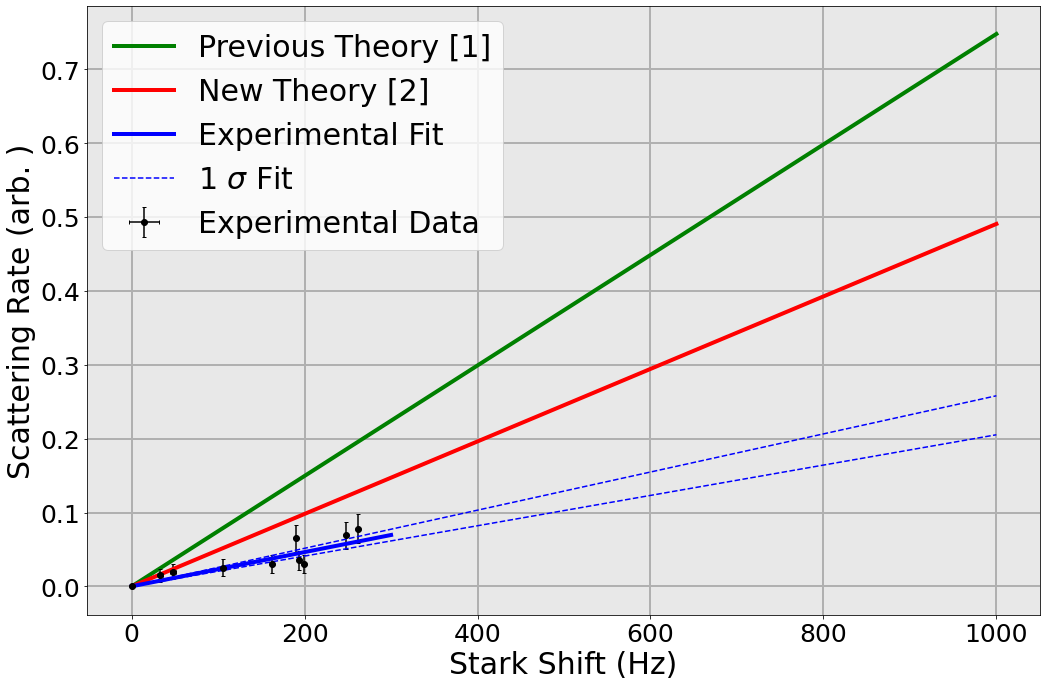

In [6]:


##Plotting Results###
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams.update({'font.size': 22})

fig = plt.figure()
# fig.suptitle('D_5/2 532 Scattering Rate', fontsize=20)
ax = fig.gca()
ax.ticklabel_format(useOffset=False)
ax.patch.set_facecolor('lightgrey')
ax.patch.set_alpha(.5)
plt.xlabel("Stark Shift (Hz)",fontsize=30)
plt.ylabel("Scattering Rate (arb. )",fontsize=30)

plt.plot(xme, oz_yme, color = 'green', label = 'Previous Theory [1]',linewidth = 4)
plt.plot(xme,yme, color = 'r', label = 'New Theory [2]',linewidth = 4)
# plt.plot(xme,y5, color = 'r', label = ' Theory',linewidth = 2)


plt.errorbar(nx,ny, xerr =nxsig, yerr=nysig, fmt='o',color ='black',label = 'Experimental Data', capsize=2)
plt.plot(nx_fit,nfit, color = 'blue', label = 'Experimental Fit',linewidth = 4)
# plt.plot(xme,yerrp,'b--',label = ' $\sigma$ light fit standard deviation' )
# plt.plot(xme,yerrm,'b--')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.plot(xme,yerrp,'b--',label = '1 $\sigma$ Fit' )
plt.plot(xme,yerrm,'b--')

plt.legend(loc="upper left",fontsize=30)
plt.tight_layout()
plt.grid(linewidth=2)
plt.savefig("Z:\Group_Share\Barium\Posters and Presentations\DAMOP 2022\D_Scat_pdf.pdf", dpi = 2000, transparent=True)

plt.show()